In [1]:
import spotipy
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="4d56e8b1f0754a0ba00cd68945bd75a0",
                                                           client_secret="1c9978af70c64defb32ada84e7b1289e",
                                                            redirect_uri="http://localhost:8000",
                                                            scope="user-library-read"))



In [2]:
playlists = sp.current_user_playlists(limit=50, offset=0)

playlist_ids = []

for i, playlist in enumerate(playlists['items']):
    print(playlist['name'])
    playlist_ids.append(playlist['id'])

playlist_ids 

Gaming Music You'll Love
DamnDude
Viagi
CHURRAS - ZUBS EDITION
As 50 mais tocadas no Brasil
Puppys and Kittens v2
Pop Up
omelette du fromage
 
Liked from Radio
Jonathan Young & Friends - Anime and Game Rock Covers
Best videogame soundtracks
Fantasy Bard Songs
...........................
Top Gaming Tracks
Gamer Gang
Hora de Dormir
Brain Food
Road Trip
Your Top Songs 2018
Tastebreakers
spoofy: Ramon, Douglas and Thiago
Discover Weekly
Puppys and Kittens


['2DTbjZcIPUuEQqM259UtVS',
 '1OAkJqZDSe7AUSzLbB1uwp',
 '5vcdEZJqwgTKuQUkFHUkYG',
 '5zKtUrufT4LVyuXZWi76GT',
 '37i9dQZEVXbMXbN3EUUhlg',
 '7DtMjUQtTCiH2FXlyEiYVe',
 '37i9dQZF1DX6aTaZa0K6VA',
 '48MzBhaJTazGPGpzqCiZrq',
 '5K6Ru0Vl2N7VtNCIDri5ok',
 '3NYARHaX1QzQxFESg6zYyU',
 '7iO9wVEHMAoP7aJLUkNyYP',
 '2z9Vt8ErOoTr2cR4BSHVnW',
 '4WMstN0rrIiIKH4oXIW1rS',
 '7hydaS96GZSwoj8M6xEEde',
 '37i9dQZF1DWTyiBJ6yEqeu',
 '37i9dQZF1DX7GWlXStIq5M',
 '37i9dQZF1DX05Zqxyo07cQ',
 '37i9dQZF1DWXLeA8Omikj7',
 '39kqOKoiaH5cECQew17Hfn',
 '37i9dQZF1EjvY1clF474ZD',
 '37i9dQZF1EjcQfyQ8q1xDH',
 '7evgFjox79ixZC4Hv8EqnW',
 '37i9dQZEVXcJnp3sRyvQXy',
 '7LHsSfvoXTDZHFGtQWMXGw']

In [3]:
offset = 0
items = []
names = []
songs = []  

for playlist_id in playlist_ids :
    print(playlist_id)
    offset = 0
    while True:
        content = sp.user_playlist_tracks(playlist_id=playlist_id,limit=50, offset=offset)
        songs += content['items']
        if content['next'] is not None:
            offset += 50
        else:
            break
            
offset = 0
while True:
    content = sp.current_user_saved_tracks(limit=50, offset=offset)
    songs += content['items']
    if content['next'] is not None:
        offset += 50
    else:
        break
len(songs)

2DTbjZcIPUuEQqM259UtVS
1OAkJqZDSe7AUSzLbB1uwp
5vcdEZJqwgTKuQUkFHUkYG
5zKtUrufT4LVyuXZWi76GT
37i9dQZEVXbMXbN3EUUhlg
7DtMjUQtTCiH2FXlyEiYVe
37i9dQZF1DX6aTaZa0K6VA
48MzBhaJTazGPGpzqCiZrq
5K6Ru0Vl2N7VtNCIDri5ok
3NYARHaX1QzQxFESg6zYyU
7iO9wVEHMAoP7aJLUkNyYP
2z9Vt8ErOoTr2cR4BSHVnW
4WMstN0rrIiIKH4oXIW1rS
7hydaS96GZSwoj8M6xEEde
37i9dQZF1DWTyiBJ6yEqeu
37i9dQZF1DX7GWlXStIq5M
37i9dQZF1DX05Zqxyo07cQ
37i9dQZF1DWXLeA8Omikj7
39kqOKoiaH5cECQew17Hfn
37i9dQZF1EjvY1clF474ZD
37i9dQZF1EjcQfyQ8q1xDH
7evgFjox79ixZC4Hv8EqnW
37i9dQZEVXcJnp3sRyvQXy
7LHsSfvoXTDZHFGtQWMXGw


3658

In [4]:
index = 0
audio_features = []
ids = []

for i in songs: 
    try :
        ids.append(i['track']['id'])
    except:    
        try:
            ids.append(i['id'])
        except:
            continue
    
print(len(ids))
while index < len(ids):
    print(index)
    try:
        audio_features += sp.audio_features(ids[index:index + 10])
    except:
        print('Continue')
    index += 10

features_list = []
for features in audio_features:
    try :
        features_list.append([features['energy'], features['liveness'],
                          features['speechiness'], features['danceability'], 
                          features['valence'], features['uri']])
    except:
        continue
    

df = pd.DataFrame(features_list, columns=['energy', 'liveness',
                                           'speechiness', 'danceability',
                                              'valence', 'uri'])

df.to_csv('data/audio_features.csv', index=False)

3656
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
Continue
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
21

In [5]:
for index, row in df.iterrows():
    print(index)
    uri = row['uri']
    track = sp.track(uri)
    artist_uri = track['album']['artists'][0]['uri']
    artist = sp.artist(artist_uri)    
    genres = artist['genres']
    print(genres)
    str_genres = ' '.join([str(elem) for elem in genres])
    row['genre'] = str_genres
    df.loc[index, 'genre'] = row['genre']

0
[]
1
[]
2
['deep groove house', 'house', 'pop dance', 'tropical house', 'uk dance']
3
[]
4
[]
5
['gymcore', 'post-screamo']
6
['hampton roads indie']
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
['canadian indie', 'halifax indie']
18
[]
19
[]
20
[]
21
[]
22
[]
23
[]
24
[]
25
[]
26
[]
27
[]
28
[]
29
[]
30
[]
31
[]
32
[]
33
[]
34
['brooklyn indie', 'indie pop', 'indie rock', 'indie surf', 'modern rock', 'new rave']
35
[]
36
[]
37
[]
38
[]
39
[]
40
[]
41
[]
42
[]
43
[]
44
[]
45
[]
46
[]
47
[]
48
[]
49
[]
50
[]
51
[]
52
[]
53
[]
54
[]
55
[]
56
['texas pop punk']
57
[]
58
[]
59
[]
60
[]
61
[]
62
[]
63
[]
64
[]
65
[]
66
[]
67
[]
68
[]
69
[]
70
[]
71
[]
72
[]
73
['seattle hip hop']
74
[]
75
[]
76
[]
77
[]
78
[]
79
[]
80
[]
81
[]
82
['uk pop punk']
83
[]
84
[]
85
[]
86
[]
87
[]
88
[]
89
[]
90
[]
91
[]
92
[]
93
[]
94
[]
95
[]
96
[]
97
[]
98
[]
99
[]
100
[]
101
[]
102
[]
103
[]
104
[]
105
[]
106
[]
107
[]
108
[]
109
[]
110
[]
111
[]
112
[]
113
[]
114
[]
115
[]
116
[]
117
['canad

['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
275
['detroit hip hop', 'hip hop', 'rap']
276
['neo mellow', 'pop', 'pop rock', 'viral pop']
277
['permanent wave', 'pop']
278
['glam metal', 'rock']
279
[]
280
['beatlesque', 'britpop', 'madchester', 'modern rock', 'permanent wave', 'rock']
281
['canadian pop punk', 'canadian punk', 'canadian rock', 'pop punk']
282
['dance pop', 'latin', 'miami hip hop', 'pop', 'pop dance', 'pop rap']
283
['modern rock', 'pop punk', 'post-grunge', 'rock']
284
['emo', 'modern rock', 'pop punk']
285
['modern rock', 'pop punk', 'post-grunge', 'rock']
286
['modern rock', 'pop punk', 'post-grunge', 'rock']
287
['alternative metal', 'nu metal', 'post-grunge']
288
['art pop', 'dance pop', 'metropopolis', 'nz pop', 'pop', 'pop dance']
289
['alternative metal', 'christian rock', 'gymcore', 'nu metal', 'post-grunge', 'post-screamo', 'rap rock']
290
['art pop', 'pop']
291
['boy band', 'pop', 'post-teen pop', 'talent show']
292
['big beat

['modern rock', 'rock']
419
['alternative metal']
420
['alternative metal', 'nu metal', 'post-grunge']
421
['emo', 'modern rock', 'pop punk']
422
['emo', 'modern rock', 'pop punk']
423
['modern rock', 'pop', 'rock']
424
['hip hop', 'new orleans rap', 'pop rap', 'rap', 'trap']
425
['celtic rock', 'dance pop', 'neo mellow', 'pop', 'pop rock', 'post-teen pop', 'viral pop']
426
['alternative metal', 'groove metal', 'nu metal']
427
['alternative metal', 'nu metal', 'post-grunge', 'rap metal']
428
['alternative metal', 'nu metal', 'post-grunge']
429
['alternative metal', 'canadian ccm', 'canadian metal', 'canadian rock', 'christian alternative rock', 'christian rock', 'nu metal', 'rap metal']
430
['alternative metal', 'nu metal', 'post-grunge', 'rap metal']
431
['alternative metal', 'nu metal', 'pop rock', 'post-grunge']
432
['permanent wave', 'pop punk', 'punk']
433
['permanent wave', 'pop punk', 'punk']
434
['pop', 'r&b', 'soul']
435
['pop', 'r&b', 'soul']
436
['alternative metal', 'canadi

['alternative metal', 'pop punk']
552
['alternative metal', 'permanent wave', 'punk', 'rock', 'skate punk', 'socal pop punk']
553
['alternative metal', 'nu metal', 'post-grunge', 'rap metal']
554
['eurovision']
555
['pop', 'pop rock']
556
['indie rock', 'modern alternative rock', 'modern rock', 'punk blues', 'rock']
557
['alternative metal', 'alternative rock', 'modern rock', 'nu metal', 'permanent wave', 'post-grunge', 'rock', 'supergroup']
558
['chicago rap', 'conscious hip hop', 'hip hop', 'political hip hop', 'pop rap', 'rap', 'southern hip hop']
559
['alternative metal', 'canadian rock', 'nu metal', 'post-grunge']
560
['brazilian rock', 'hard rock brasileiro', 'rock alternativo brasileiro', 'rock nacional brasileiro']
561
[]
562
['ccm', 'christian alternative rock', 'christian hip hop', 'christian music', 'worship']
563
['pop', 'r&b', 'soul']
564
['alternative rock', 'garage rock', 'modern rock', 'rock']
565
['alternative metal', 'nu metal', 'post-grunge']
566
['alternative metal'

['neo mellow', 'pop', 'pop rock']
691
['dance pop', 'latin', 'latin pop', 'latin viral pop', 'pop', 'post-teen pop', 'rap latina', 'reggaeton', 'trap latino']
692
['australian dance', 'australian pop', 'dance pop', 'pop', 'pop dance']
693
['dance pop', 'funk carioca', 'pop', 'pop lgbtq+ brasileira']
694
['dance pop', 'funk carioca', 'pop', 'pop lgbtq+ brasileira']
695
[]
696
['funk carioca', 'funk ostentacao']
697
['funk das antigas', 'funk melody', 'funk ostentacao']
698
['funk das antigas', 'funk melody', 'funk ostentacao']
699
['funk carioca', 'pop nacional']
700
['mpb', 'nova mpb', 'pop nacional']
701
['brazilian rock', 'folk brasileiro', 'mpb', 'nova mpb']
702
['funk carioca', 'funk ostentacao', 'funk pop']
703
['funk carioca', 'pop lgbtq+ brasileira']
704
['funk carioca', 'nova mpb', 'nova musica pernambucana']
705
['funk carioca', 'funk pop', 'pagode baiano', 'pop nacional']
706
['funk carioca', 'funk das antigas', 'funk ostentacao', 'funk pop']
707
['folk brasileiro', 'nova mpb

['alternative metal', 'permanent wave', 'punk', 'rock', 'skate punk', 'socal pop punk']
858
['emo', 'modern rock', 'pop punk']
859
['emo', 'modern rock', 'pop punk']
860
['emo', 'modern rock', 'pop punk']
861
['emo', 'modern rock', 'pop punk']
862
['emo', 'modern rock', 'pop punk']
863
['baroque pop', 'emo', 'modern rock']
864
['baroque pop', 'emo', 'modern rock']
865
['baroque pop', 'emo', 'modern rock']
866
['alternative metal', 'canadian pop punk', 'canadian punk', 'nu metal', 'pop punk', 'punk']
867
['alternative metal', 'canadian pop punk', 'canadian punk', 'nu metal', 'pop punk', 'punk']
868
['pop punk', 'punk', 'socal pop punk']
869
['pop punk', 'punk', 'socal pop punk']
870
['alternative metal', 'christian alternative rock', 'christian music', 'christian rock']
871
['alternative metal', 'christian alternative rock', 'christian music', 'christian rock']
872
['alternative metal', 'christian alternative rock', 'christian music', 'christian rock']
873
['alternative metal', 'industr

['big room', 'deep big room', 'edm', 'electro house', 'future house', 'house', 'pop dance', 'pop edm', 'progressive electro house', 'tropical house']
994
['dance pop', 'pop']
995
['dance pop', 'pop']
996
['dance pop', 'pop']
997
['dance pop', 'pop']
998
['dance pop', 'pop', 'pop dance', 'pop rap', 'post-teen pop']
999
['colombian pop', 'dance pop', 'latin', 'latin pop', 'pop']
1000
['atl hip hop', 'dance pop', 'dirty south rap', 'pop rap', 'rap', 'southern hip hop', 'trap']
1001
['boy band', 'dance pop', 'europop']
1002
['boy band', 'dance pop', 'europop']
1003
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
1004
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
1005
['deep flow']
1006
['alternative rock', 'garage rock', 'modern rock', 'permanent wave', 'rock']
1007
['alternative metal', 'funk metal', 'nu metal', 'rap metal', 'wrestling']
1008
['video game music']
1009
['video game music']
1010
['modern rock', 'pop', 'rock']
1011
['video game music']
1012
['dutch metal', 'gothic 

['la indie', 'pop']
1186
['dance pop', 'pop']
1187
['dance pop', 'edm', 'electro house', 'moombahton', 'pop', 'pop dance', 'pop rap']
1188
['funk carioca', 'funk pop', 'pagode baiano', 'pop nacional']
1189
['latin', 'puerto rican pop', 'reggaeton', 'trap latino']
1190
['latin', 'panamanian pop', 'reggaeton', 'trap latino']
1191
['dance pop', 'latin', 'latin pop', 'latin viral pop', 'pop', 'post-teen pop', 'rap latina', 'reggaeton', 'trap latino']
1192
['dance pop', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'urban contemporary']
1193
['k-pop', 'k-pop boy group']
1194
['country rap', 'lgbtq+ hip hop', 'pop rap', 'queer country']
1195
['hip pop', 'neo soul', 'pop', 'r&b', 'urban contemporary']
1196
['pop', 'uk pop']
1197
['art pop', 'pop']
1198
['pop', 'post-teen pop']
1199
['pop', 'post-teen pop']
1200
['dance pop', 'edm', 'pop', 'pop dance', 'post-teen pop', 'scandipop', 'swedish electropop', 'swedish pop', 'tropical house']
1201
['dance pop', 'indietronica', 'metropopolis', 'pop'

['canadian soundtrack', 'epicore', 'scorecore', 'soundtrack', 'video game music']
1407
['canadian soundtrack', 'epicore', 'scorecore', 'soundtrack', 'video game music']
1408
['classic rock', 'dance rock', 'permanent wave', 'punk', 'rock']
1409
[]
1410
[]
1411
['chamber pop', 'freak folk', 'indie folk', 'new weird america']
1412
['american folk revival', 'folk', 'folk rock', 'singer-songwriter', 'traditional folk']
1413
[]
1414
['otacore', 'scorecore', 'video game music']
1415
['alternative metal', 'finnish alternative rock']
1416
['scorecore', 'video game music']
1417
['otacore', 'scorecore', 'video game music']
1418
['otacore', 'scorecore', 'video game music']
1419
['scorecore', 'video game music']
1420
[]
1421
[]
1422
['british soundtrack', 'epicore', 'scorecore', 'soundtrack', 'video game music']
1423
['video game music']
1424
['video game music']
1425
[]
1426
['epicore', 'scorecore', 'soundtrack', 'video game music']
1427
['scorecore', 'video game music']
1428
['scorecore', 'video 

['neo-pagan']
1661
['celtic', 'medieval folk', 'neoclassical darkwave']
1662
['epicore', 'scorecore', 'soundtrack', 'video game music']
1663
[]
1664
['epicore']
1665
['viral pop']
1666
['epicore']
1667
['video game music']
1668
['video game music']
1669
[]
1670
['celtic', 'irish folk']
1671
["children's choir", 'choral', 'new age', 'operatic pop']
1672
['celtic', 'celtic rock', 'geek folk', 'medieval folk', 'steampunk']
1673
['video game music']
1674
[]
1675
[]
1676
['celtic', 'medieval folk', 'neoclassical darkwave']
1677
[]
1678
[]
1679
['c-pop', 'cantopop', 'chinese indie', 'classic cantopop', 'classic mandopop', 'mandopop']
1680
['otacore']
1681
['hurdy-gurdy', 'medieval folk']
1682
['melodic metal', 'slayer']
1683
['cape breton folk', 'irish neo-traditional']
1684
['cape breton folk', 'irish neo-traditional']
1685
[]
1686
['epicore']
1687
['hurdy-gurdy', 'medieval folk']
1688
[]
1689
[]
1690
[]
1691
[]
1692
[]
1693
[]
1694
['celtic', 'operatic pop']
1695
['celtic', 'celtic rock', 

['dance pop', 'pop', 'pop dance', 'post-teen pop']
1834
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
1835
['candy pop', 'emo', 'pixie', 'pop emo', 'pop punk']
1836
['pop dance']
1837
['boy band', 'dance pop', 'pop', 'pop dance', 'pop rock', 'post-teen pop']
1838
['acoustic pop', 'neo mellow', 'pop', 'pop rock']
1839
['big room', 'dance pop', 'deep big room', 'dutch house', 'edm', 'electro house', 'pop dance', 'progressive electro house', 'progressive house', 'tropical house']
1840
['dance pop', 'electropop', 'metropopolis', 'pop', 'pop dance', 'pop rap', 'post-teen pop', 'swedish electropop', 'swedish pop', 'swedish synthpop', 'tropical house']
1841
['dance pop', 'pop']
1842
['british soul', 'pop', 'pop soul', 'uk pop']
1843
['acoustic pop', 'neo mellow', 'pop', 'pop rock']
1844
[]
1845
['dance pop', 'edm', 'electro house', 'electronic trap', 'pop', 'pop dance', 'pop rap']
1846
['beatlesque', 'britpop', 'madchester', 'modern rock', 'permanent wave', 'rock']
1847
['canadian conte

['trap baiano', 'trap brasileiro']
2014
['pop rap']
2015
['brazilian hip hop', 'funk ostentacao']
2016
['trap brasileiro']
2017
['melodic rap', 'rap', 'trap']
2018
['trap baiano', 'trap brasileiro']
2019
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap']
2020
['brazilian hip hop', 'trap brasileiro']
2021
[]
2022
['north carolina hip hop', 'rap']
2023
['rap mineiro']
2024
['brazilian hip hop', 'funk ostentacao']
2025
['funk ostentacao', 'trap brasileiro']
2026
[]
2027
['chicago rap', 'melodic rap']
2028
['brazilian hip hop']
2029
['brazilian hip hop', 'trap brasileiro']
2030
['rap']
2031
[]
2032
['chicago rap', 'melodic rap']
2033
['trap brasileiro']
2034
['brazilian hip hop']
2035
['rap baixada fluminense', 'trap carioca']
2036
['rap mineiro']
2037
['brazilian hip hop', 'funk ostentacao']
2038
['funk ostentacao', 'trap brasileiro']
2039
['trap carioca', 'trap pesado']
2040
['rap df']
2041
[]
2042
['brazilian hip hop', 'funk carioca', 'trap brasileiro']
204

['background music', 'calming instrumental', 'focus']
2382
['background music', 'focus']
2383
[]
2384
['compositional ambient', 'focus', 'japanese piano', 'neo-classical']
2385
['focus']
2386
['background music', 'focus']
2387
['ambient', 'compositional ambient', 'electronica', 'intelligent dance music', 'neo-classical', 'post-rock']
2388
['background music']
2389
['background music', 'calming instrumental', 'focus']
2390
['background music', 'calming instrumental', 'focus']
2391
['background music']
2392
['background music', 'background piano', 'calming instrumental', 'focus', 'neo-classical']
2393
['background piano']
2394
[]
2395
['background music']
2396
['background music', 'focus']
2397
['bow pop', 'compositional ambient', 'icelandic classical', 'neo-classical', 'neoclassical darkwave']
2398
['background piano']
2399
['background music']
2400
[]
2401
['background music']
2402
[]
2403
['background music']
2404
[]
2405
[]
2406
[]
2407
[]
2408
[]
2409
[]
2410
[]
2411
[]
2412
[]
2413

['rebel blues']
2559
['emo', 'modern rock', 'pop punk']
2560
['garage rock', 'modern rock', 'permanent wave', 'rock', 'sheffield indie']
2561
['latin', 'latin pop', 'pop venezolano', 'reggaeton', 'trap latino']
2562
['pop', 'pop rap']
2563
[]
2564
['indie poptimism', 'modern rock', 'pop']
2565
['epicore', 'modern alternative rock']
2566
['indie pop rap', 'pop rap']
2567
['edm', 'pop', 'pop dance', 'tropical house']
2568
['rebel blues']
2569
['rebel blues']
2570
['epicore', 'rebel blues']
2571
['alternative rock', 'blues rock', 'garage rock', 'modern alternative rock', 'modern blues rock', 'modern rock', 'punk blues', 'rock']
2572
['psychedelic trance']
2573
['electro swing', 'nu jazz']
2574
['indie anthem-folk', 'indie cafe pop', 'indie folk', 'modern alternative rock', 'modern rock']
2575
['rebel blues']
2576
['dance pop', 'edm', 'pop', 'pop dance', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky']
2577
['electro house']
2578
['modern rock', 'pop', 'rock']
2579
['big room', '

['emo', 'modern rock', 'pop punk']
2717
['permanent wave', 'pop']
2718
['modern rock', 'neo mellow', 'pop', 'pop rock']
2719
['pop', 'pop rock']
2720
['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'rock']
2721
['alternative metal', 'canadian ccm', 'canadian metal', 'canadian rock', 'christian alternative rock', 'christian rock', 'nu metal', 'rap metal']
2722
['album rock', 'classic rock', 'hard rock', 'rock']
2723
['alternative metal', 'nu metal', 'post-grunge']
2724
['permanent wave', 'pop']
2725
['alternative metal', 'nu metal', 'post-grunge']
2726
['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'rock']
2727
['alternative metal', 'canadian ccm', 'canadian metal', 'canadian rock', 'christian alternative rock', 'christian rock', 'nu metal', 'rap metal']
2728
['emo', 'modern rock', 'pop punk']
2729
['emo', 'modern rock', 'pop punk']
2730
['alternative metal', 'canadian metal', 'canadian rock', 'nu metal', 'post-grunge']
2731
['pop', 'pop rock']
2732


['dance pop', 'edm', 'electro house', 'house', 'pop', 'pop dance', 'progressive house', 'uk dance']
2864
['dance pop', 'edm', 'electro house', 'house', 'pop', 'pop dance', 'progressive house', 'uk dance']
2865
['dance pop', 'edm', 'electro house', 'house', 'pop', 'pop dance', 'progressive house', 'uk dance']
2866
['dance pop', 'edm', 'electro house', 'house', 'pop', 'pop dance', 'progressive house', 'uk dance']
2867
['big room', 'dance pop', 'edm', 'pop', 'pop dance']
2868
['big room', 'dance pop', 'edm', 'pop', 'pop dance']
2869
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2870
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2871
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2872
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2873
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2874
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2875
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
2876
['dance pop', 'e

['dance pop', 'pop', 'pop rap', 'seattle hip hop']
2980
['indie poptimism', 'metropopolis', 'modern alternative rock', 'modern rock', 'pop']
2981
['indie poptimism', 'metropopolis', 'modern alternative rock', 'modern rock', 'pop']
2982
['indie poptimism', 'metropopolis', 'modern alternative rock', 'modern rock', 'pop']
2983
['tropical house', 'uk contemporary r&b']
2984
['tropical house', 'uk contemporary r&b']
2985
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
2986
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
2987
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
2988
['antiviral pop', 'comic', 'epicore', 'irish metal', 'otacore', 'scorecore', 'video game music']
2989
['anime latino', 'otacore']
2990
['antiviral pop', 'comic', 'epicore', 'irish metal', 'otacore', 'scorecore', 'video game music']
2991
['antiviral pop', 'comic', 'epicore', 'irish metal', 'otacore', 'scorecore', 'video game music']
2992
[]
2993
['otacore', 'scorecore']
2994
['australian dance', 'australian

['chicago rap', 'dance pop', 'dirty south rap', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'trap', 'urban contemporary']
3099
['dance pop', 'pop', 'post-teen pop', 'viral pop']
3100
['aussietronica', 'edm', 'electra', 'electro house', 'electronic trap', 'electropop', 'escape room', 'indietronica']
3101
['indie poptimism', 'la indie', 'modern alternative rock', 'modern rock', 'shimmer pop']
3102
['acid rock', 'album rock', 'classic rock', 'psychedelic rock', 'rock']
3103
['punk', 'ska', 'ska punk', 'skate punk']
3104
['acid rock', 'album rock', 'classic rock', 'psychedelic rock', 'rock']
3105
['brostep', 'complextro', 'edm', 'electro']
3106
['indie rock', 'modern alternative rock', 'modern rock', 'punk blues', 'rock']
3107
['indie rock']
3108
['downtempo', 'electronica', 'trip hop']
3109
['alternative metal', 'funk metal', 'nu metal', 'rap metal', 'rap rock']
3110
['alternative metal', 'funk metal', 'nu metal', 'rap metal', 'rap rock']
3111
['alternative metal', 'funk metal', 'nu meta

['dance pop', 'electropop', 'idol', 'pop', 'pop dance', 'post-teen pop']
3205
['chicago punk', 'emo', 'pop punk', 'punk', 'screamo', 'skate punk']
3206
['modern rock', 'permanent wave', 'piano rock']
3207
['pop', 'uk pop']
3208
['pop', 'uk pop']
3209
['permanent wave', 'pop']
3210
['dance pop', 'edm', 'electro house', 'electronic trap', 'pop', 'pop dance', 'pop rap']
3211
['dance pop', 'hip pop', 'pop r&b', 'r&b', 'rap', 'southern hip hop', 'trap', 'urban contemporary']
3212
['k-pop', 'k-rap']
3213
['canadian latin', 'canadian pop', 'dance pop', 'pop', 'pop dance', 'pop rap']
3214
['beatlesque', 'britpop', 'madchester', 'modern rock', 'permanent wave', 'rock']
3215
['brazilian rock', 'mpb', 'pop nacional']
3216
['chicago rap', 'rap']
3217
['g funk', 'gangster rap', 'hip hop', 'rap', 'west coast rap']
3218
['east coast hip hop', 'gangster rap', 'hip hop', 'pop rap', 'queens hip hop', 'rap']
3219
['atl hip hop', 'crunk', 'dirty south rap', 'gangster rap', 'pop rap', 'rap', 'southern hip 

['folk brasileiro', 'nova mpb', 'pop lgbtq+ brasileira', 'pop nacional', 'portuguese pop']
3353
['funk carioca', 'pop nacional']
3354
['funk carioca', 'funk pop', 'pagode baiano', 'pop nacional']
3355
['modern rock', 'pop', 'rock']
3356
['emo', 'modern rock', 'pop punk']
3357
['alternative metal', 'christian alternative rock', 'christian music', 'christian rock']
3358
['alternative metal', 'christian alternative rock', 'christian music', 'christian rock']
3359
['rebel blues']
3360
['canadian pop', 'pop', 'post-teen pop']
3361
['alternative metal', 'christian alternative rock', 'christian rock', 'nu metal', 'post-grunge', 'rap rock']
3362
['funk carioca', 'trap funk']
3363
['alternative metal', 'nu metal', 'post-grunge']
3364
['video game music']
3365
['nightcore']
3366
['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
3367
['alternative metal', 'alternative rock', 'modern rock', 'permanent wave', 'post-grunge', 'rock']
3368
['alternative 

['chicago house']
3486
['candy pop', 'emo', 'pixie', 'pop emo', 'pop punk']
3487
['dance pop', 'pop', 'pop dance', 'post-teen pop']
3488
['dance pop', 'edm', 'pop', 'pop dance', 'pop rap']
3489
['emo rap', 'miami hip hop']
3490
['dakke dak', 'danish pop']
3491
['atl hip hop', 'dance pop', 'pop', 'r&b', 'south carolina hip hop', 'urban contemporary']
3492
['dance pop', 'pop', 'pop dance', 'post-teen pop']
3493
['dance pop', 'pop', 'pop dance', 'uk pop']
3494
['dance pop', 'pop', 'pop dance', 'post-teen pop']
3495
['arkansas country', 'outlaw country']
3496
['alternative metal', 'comic', 'funk metal', 'funk rock', 'nu metal', 'punk', 'rap rock']
3497
['brazilian edm', 'nova mpb']
3498
[]
3499
['dance pop', 'edm', 'pop', 'pop dance', 'post-teen pop', 'tropical house', 'uk dance', 'uk funky']
3500
['dance pop', 'edm', 'pop', 'pop dance', 'tropical house']
3501
['indie poptimism', 'modern alternative rock']
3502
['dance pop', 'pop']
3503
['chicago rap', 'conscious hip hop', 'hip hop', 'poli

In [6]:
print(df.head())
df.to_csv('data/final_audio_features.csv', index=False)

   energy  liveness  speechiness  danceability  valence  \
0   0.371     0.315       0.1090         0.844    0.286   
1   0.759     0.086       0.0462         0.619    0.211   
2   0.747     0.173       0.0859         0.568    0.177   
3   0.766     0.352       0.0315         0.687    0.583   
4   0.849     0.245       0.0830         0.742    0.358   

                                    uri  \
0  spotify:track:4TvYoekBPWtECvJA7x0r9W   
1  spotify:track:1nrbhaFaOqm8qhdeX5kzxy   
2  spotify:track:5JoyR8wu5YAyp9DWCj96Lh   
3  spotify:track:6gTaTPCJ45z67R2rzzY0Ea   
4  spotify:track:3ABBsIzo8tU5SzZwlDS9cn   

                                               genre  
0                                                     
1                                                     
2  deep groove house house pop dance tropical hou...  
3                                                     
4                                                     


In [7]:
df = pd.read_csv("data/final_audio_features.csv")
df1 = pd.read_csv("data/final_audio_features.csv")
df1.drop(['uri', 'genre'], axis=1, inplace=True)

In [8]:
from sklearn import preprocessing
x = df1.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled, columns=['energy', 'liveness', 'danceability', 'speechiness', 'valence'])
df1.head()

energy  liveness  danceability  speechiness   valence
0  0.372307  0.303401      0.122089     0.856674  0.272689
1  0.762603  0.068119      0.033451     0.610503  0.194089
2  0.750532  0.157505      0.089485     0.554705  0.158457
3  0.769645  0.341416      0.012703     0.684902  0.583945
4  0.853136  0.231481      0.085392     0.745077  0.348145

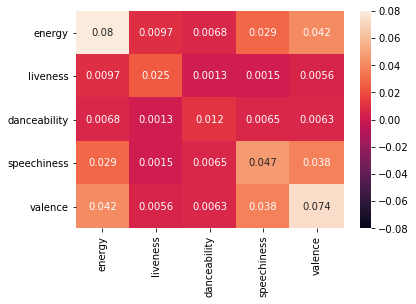

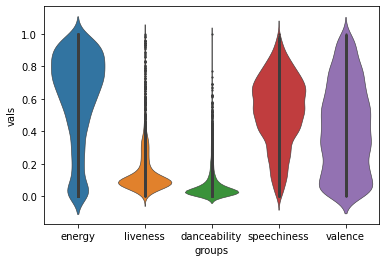

In [9]:
import seaborn as sns
ax = sns.heatmap(df1.cov(),vmin=-0.08, vmax=0.08, annot = True)
plt.show()

df2 = df1.melt(var_name='groups', value_name='vals')
ax = sns.violinplot(x="groups", y="vals", data=df2, linewidth = 0.6, inner = 'point', scale= 'width')
plt.show()

In [10]:
from itertools import permutations

columns=['energy', 'liveness', 'danceability', 'speechiness', 'valence']

perm = permutations(columns, 3)
output = set(map(lambda x: tuple(sorted(x)),perm))
a=[]
column_names = ["features", "score", "elbow"]
df3 = pd.DataFrame(columns = column_names)

D:\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
D:\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\Anaconda\lib\site-packages\yellowbrick\u

                      features     score elbow
0     [danceability, liveness]  0.441681     5
1     [danceability, liveness]  0.441681     5
2        [energy, speechiness]  0.523405     4
3      [liveness, speechiness]  0.636156     3
4  [danceability, speechiness]  0.482768     4


D:\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\Anaconda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\Anaconda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


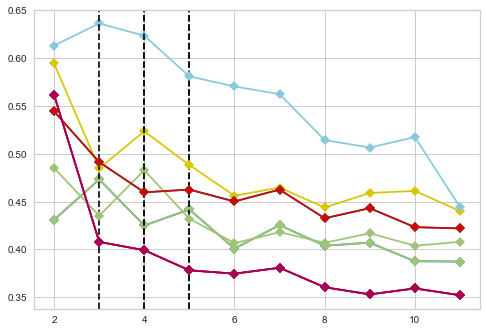

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

for i in list(output):
    df1 = df[[i[0], i[1]]]
    x = df1.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)

    model = KMeans(random_state=0)
    visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)
    visualizer.fit(x_scaled)
    score = visualizer.elbow_score_
    value = visualizer.elbow_value_
    if score>0.4:
        # visualizer.show()
        idx = df1.columns
        mylist = idx.tolist()
        dict = {
            "features": mylist,
            "score": score,
            "elbow": value
        }
        df3 = df3.append(dict, ignore_index=True)

print(df3)

In [12]:
df3.sort_values(by='score')

features     score elbow
0     [danceability, liveness]  0.441681     5
1     [danceability, liveness]  0.441681     5
4  [danceability, speechiness]  0.482768     4
2        [energy, speechiness]  0.523405     4
3      [liveness, speechiness]  0.636156     3

In [13]:
df1 = df[['energy','valence']]

x = df1.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled2 = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled2)

In [14]:
import plotly.express as px
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15,
                max_iter = 500).fit(x_scaled2)
df1['kmeans'] = kmeans.labels_
df1.columns = ['energy', 'valence','kmeans' ]


kmeans = df1['kmeans']
df['kmeans'] = kmeans

fig = px.scatter_3d(df, x='energy', y='speechiness', z='valence',
              color='kmeans')
fig.show()

In [15]:
df1

energy   valence  kmeans
0     0.372307  0.272689       3
1     0.762603  0.194089       0
2     0.750532  0.158457       3
3     0.769645  0.583945       2
4     0.853136  0.348145       0
...        ...       ...     ...
3630  0.721360  0.428841       0
3631  0.923550  0.298889       0
3632  0.687159  0.297841       3
3633  0.739467  0.291553       0
3634  0.376330  0.167889       3

[3635 rows x 3 columns]

In [16]:
c0 = df[df1['kmeans']==0]
c1 = df[df1['kmeans']==1]
c2 = df[df1['kmeans']==2]
c3 = df[df1['kmeans']==3]
# c4 = df[df1['kmeans']==4]
# c5 = df[df1['kmeans']==5]
# c6 = df[df1['kmeans']==6]
# c7 = df[df1['kmeans']==7]
# c8 = df[df1['kmeans']==8]

clusters = []
clusters.append(c0)
clusters.append(c1)
clusters.append(c2)
clusters.append(c3)
# clusters.append(c4)
# clusters.append(c5)
# clusters.append(c6)
# clusters.append(c7)
# clusters.append(c8)

In [17]:
def getAvgValue(value, parameter):
    category = ''
    if (value < 0.25):
        category = 'Low'
    elif (value > 0.75):
        category = 'High'
    else :
        if (value > 0.51):
            category = 'Medium High'
        elif (value < 0.49) :
            category = 'Medium Low'
        else :
            category = 'Medium'
    return category + ' ' + parameter

In [18]:
def clusterAvgData(cluster, kmeans):
    column_names = ["energy_level", "valence_level","avg_energy", "avg_valence"]
    clusterData = pd.DataFrame(columns=column_names)
    avg_energy = cluster.energy.mean()
    avg_valence = cluster.valence.mean()
    dict = {
        "energy_level": getAvgValue(avg_energy, 'Energy'),
        "valence_level": getAvgValue(avg_valence, 'Valence'),
        "avg_energy": avg_energy,
        "avg_valence": avg_valence,        
    }
    clusterData = clusterData.append(dict, ignore_index=True)
    return clusterData

In [19]:
column_names = ["energy_level", "valence_level","avg_energy", "avg_valence"]
clusterData = pd.DataFrame(columns = column_names)
i = 0
for cluster in clusters:
    data = clusterAvgData(cluster, i)
    clusterData = clusterData.append(data, ignore_index=True)
    i = i + 1

In [20]:
clusterData.sort_values(by='avg_energy', ascending=False)

energy_level        valence_level  avg_energy  avg_valence
0         High Energy   Medium Low Valence    0.830487     0.403178
2  Medium High Energy  Medium High Valence    0.747134     0.744598
3  Medium High Energy   Medium Low Valence    0.537117     0.265551
1          Low Energy          Low Valence    0.120063     0.142729

In [21]:
clusterData.to_csv('data/clusters.csv', index=False)

In [22]:
df

energy  liveness  speechiness  danceability  valence  \
0      0.371    0.3150       0.1090         0.844    0.286   
1      0.759    0.0860       0.0462         0.619    0.211   
2      0.747    0.1730       0.0859         0.568    0.177   
3      0.766    0.3520       0.0315         0.687    0.583   
4      0.849    0.2450       0.0830         0.742    0.358   
...      ...       ...          ...           ...      ...   
3630   0.718    0.1780       0.0434         0.234    0.435   
3631   0.919    0.5400       0.0792         0.509    0.311   
3632   0.684    0.0997       0.0331         0.528    0.310   
3633   0.736    0.0668       0.0362         0.597    0.304   
3634   0.375    0.1420       0.0307         0.608    0.186   

                                       uri  \
0     spotify:track:4TvYoekBPWtECvJA7x0r9W   
1     spotify:track:1nrbhaFaOqm8qhdeX5kzxy   
2     spotify:track:5JoyR8wu5YAyp9DWCj96Lh   
3     spotify:track:6gTaTPCJ45z67R2rzzY0Ea   
4     spotify:track:3ABBsIzo8tU5SzZwlDS9cn   
...                                    ...   
3630  spotify:track:2PfToXf8iMBAET5l1fu1P7   
3631  spotify:track:3bUApnYMVCEs2Ds9FsXGs5   
3632  spotify:track:0o9MIPIGM8svRpfdQGTvUX   
3633  spotify:track:45dfQtYHMebtLqLdlOXTuM   
3634  spotify:track:4XpNrvHlcTjMX7qEoXqjFt   

                                                  genre  kmeans  
0                                                   NaN       3  
1                                                   NaN       0  
2     deep groove house house pop dance tropical hou...       3  
3                                                   NaN       2  
4                                                   NaN       0  
...                                                 ...     ...  
3630                                                NaN       0  
3631  big room edm electro house electropop future b...       0  
3632  channel pop indie cafe pop indiecoustica neo m...       3  
3633                                            pop edm       0  
3634                                                NaN       3  

[3635 rows x 8 columns]

In [23]:
tracks = []
for index, row in df.iterrows():
    print(index)
    tracks.append(sp.track(row.uri))
    
tracks

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059


3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634


[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2NeOEuVdrZAwae8qXzVzPG'},
     'href': 'https://api.spotify.com/v1/artists/2NeOEuVdrZAwae8qXzVzPG',
     'id': '2NeOEuVdrZAwae8qXzVzPG',
     'name': 'STRLING',
     'type': 'artist',
     'uri': 'spotify:artist:2NeOEuVdrZAwae8qXzVzPG'}],
   'available_markets': ['AD',
    'AE',
    'AL',
    'AR',
    'AT',
    'AU',
    'BA',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'BY',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HR',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'KZ',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MD',
    'ME',
    'MK',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'N

In [24]:
tracks_df = pd.DataFrame(tracks)
tracks_df = tracks_df['name']

In [25]:
df['name'] = tracks_df
df

energy  liveness  speechiness  danceability  valence  \
0      0.371    0.3150       0.1090         0.844    0.286   
1      0.759    0.0860       0.0462         0.619    0.211   
2      0.747    0.1730       0.0859         0.568    0.177   
3      0.766    0.3520       0.0315         0.687    0.583   
4      0.849    0.2450       0.0830         0.742    0.358   
...      ...       ...          ...           ...      ...   
3630   0.718    0.1780       0.0434         0.234    0.435   
3631   0.919    0.5400       0.0792         0.509    0.311   
3632   0.684    0.0997       0.0331         0.528    0.310   
3633   0.736    0.0668       0.0362         0.597    0.304   
3634   0.375    0.1420       0.0307         0.608    0.186   

                                       uri  \
0     spotify:track:4TvYoekBPWtECvJA7x0r9W   
1     spotify:track:1nrbhaFaOqm8qhdeX5kzxy   
2     spotify:track:5JoyR8wu5YAyp9DWCj96Lh   
3     spotify:track:6gTaTPCJ45z67R2rzzY0Ea   
4     spotify:track:3ABBsIzo8tU5SzZwlDS9cn   
...                                    ...   
3630  spotify:track:2PfToXf8iMBAET5l1fu1P7   
3631  spotify:track:3bUApnYMVCEs2Ds9FsXGs5   
3632  spotify:track:0o9MIPIGM8svRpfdQGTvUX   
3633  spotify:track:45dfQtYHMebtLqLdlOXTuM   
3634  spotify:track:4XpNrvHlcTjMX7qEoXqjFt   

                                                  genre  kmeans  \
0                                                   NaN       3   
1                                                   NaN       0   
2     deep groove house house pop dance tropical hou...       3   
3                                                   NaN       2   
4                                                   NaN       0   
...                                                 ...     ...   
3630                                                NaN       0   
3631  big room edm electro house electropop future b...       0   
3632  channel pop indie cafe pop indiecoustica neo m...       3   
3633                                            pop edm       0   
3634                                                NaN       3   

                                          name  
0                                Bad Decisions  
1                        I Bet That You Regret  
2             What You Want - Kevin Gani Remix  
3                                       Fed Up  
4                                      Hold On  
...                                        ...  
3630                               I Surrender  
3631                                   Dynasty  
3632                                     Armor  
3633                       Nobody Can Hear You  
3634  Wide Awake & Dreaming - Acoustic Version  

[3635 rows x 9 columns]

In [45]:
df[(df['energy'] > 0.50) & (df['energy'] < 0.57) & (df['valence'] > 0.23) & (df['valence'] < 0.29)].sort_values(by='valence')

energy  liveness  speechiness  danceability  valence  \
587    0.540    0.3070       0.0328         0.279    0.240   
3056   0.540    0.3070       0.0328         0.279    0.240   
318    0.545    0.0963       0.0688         0.479    0.244   
3028   0.538    0.1040       0.0572         0.509    0.244   
1370   0.509    0.1150       0.0808         0.231    0.245   
3323   0.538    0.1140       0.2110         0.325    0.247   
2064   0.555    0.3150       0.1680         0.737    0.253   
674    0.534    0.0984       0.2310         0.724    0.257   
400    0.530    0.2850       0.0342         0.410    0.263   
2789   0.530    0.2850       0.0342         0.410    0.263   
2988   0.545    0.1080       0.0312         0.373    0.275   
1383   0.556    0.1970       0.0296         0.542    0.277   
2030   0.537    0.1570       0.0514         0.716    0.280   
3309   0.537    0.1570       0.0514         0.716    0.280   
1344   0.502    0.0990       0.0327         0.426    0.280   
1964   0.537    0.1570       0.0514         0.716    0.280   
736    0.525    0.0989       0.0316         0.448    0.282   
1253   0.542    0.2470       0.1970         0.692    0.285   
1721   0.513    0.3390       0.0603         0.429    0.289   
67     0.564    0.1300       0.0486         0.772    0.289   

                                       uri  \
587   spotify:track:46ERhnELy62toOMlxe14a3   
3056  spotify:track:46ERhnELy62toOMlxe14a3   
318   spotify:track:6GmUVqe73u5YRfUUynZK6I   
3028  spotify:track:7DFNE7NO0raLIUbgzY2rzm   
1370  spotify:track:0iyglTS5t81u4SFDZOGIQx   
3323  spotify:track:02OMdYU4K7TTsZKTqoZue9   
2064  spotify:track:7hmUr86smWd2FeviTU1P72   
674   spotify:track:1ry2SRTPT0w0FvdRtvr64K   
400   spotify:track:2X59ZxwE9x4pWnxsxKhr1E   
2789  spotify:track:2X59ZxwE9x4pWnxsxKhr1E   
2988  spotify:track:2TZHK04vqYWVPmIrmQ6kfL   
1383  spotify:track:3XnCZ3m0XY9Asx0XFqWFbH   
2030  spotify:track:39Yp9wwQiSRIDOvrVg7mbk   
3309  spotify:track:39Yp9wwQiSRIDOvrVg7mbk   
1344  spotify:track:2cnhi0n4UMWCXQIEaVjnm5   
1964  spotify:track:39Yp9wwQiSRIDOvrVg7mbk   
736   spotify:track:1PadKZxqN6xFucTF2qXlpY   
1253  spotify:track:06O3hxudc6V0BOuoCFSy71   
1721  spotify:track:6Jj3uAuEJpLFk3FrVQLhjE   
67    spotify:track:1irdtpOwOFZtTse5ScbIOG   

                                                  genre  kmeans  \
587                                     glam metal rock       3   
3056                                    glam metal rock       3   
318                             folk-pop neo mellow pop       3   
3028                            folk-pop neo mellow pop       3   
1370                 otacore scorecore video game music       3   
3323                modern alternative rock rebel blues       3   
2064                           trap carioca trap pesado       3   
674                                                 NaN       3   
400   album rock art rock british invasion classic r...       3   
2789  album rock art rock british invasion classic r...       3   
2988  antiviral pop comic epicore irish metal otacor...       3   
1383  japanese soundtrack japanese vgm video game music       3   
2030                                                rap       3   
3309                                                rap       3   
1344                                                NaN       3   
1964                                                rap       3   
736              antiviral pop otacore social media pop       3   
1253                      belgian pop variete francaise       3   
1721                                       middle earth       3   
67                                                  NaN       3   

                                  name  
587               Wanted Dead Or Alive  
3056              Wanted Dead Or Alive  
318                         Let Her Go  
3028                        Let Her Go  
1370       Skyrim - "Dragonborn Theme”  
3323                  Dead Man Walking  
2064                           Bendito  


In [27]:
Cluster 0 = Combate (High Energy, Medium Low Valence)
Cluster 1 = Tristeza (Low Energy, Low Valence)
Cluster 2 = Sedução (High Energy, High Valence)
Cluster 4 = Aventura/Exploração (Medium High Energy, Medium Low Valence)

SyntaxError: invalid syntax (<ipython-input-27-913839612d34>, line 1)